# Data Preprocessing and EDA

In this step, we will be loading our data from the source, analyzing them to see the peoperties and find out more about them in detail. We also will visualise the key attributes of our data and perform the data cleaning and preprocessing before feeding it to our Machine Learning model.

## 1. Install required libraries and dependencies

### 1.1  Installing Libraries

In [1]:
# Installing wordCloud for visualising the most frequent words as text cloud
!pip install wordcloud

# Installing Transformers
!pip install transformers

### 1.2 Importing Libraries

In [2]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from PIL import Image


# Text Preprocessing
import re

# Tokenizer and Model for Classification
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

## 2. Reading and checking CSV data from the source

In [3]:
# Reading the CSV file containing tweets scraped from the Twitter
df_src=pd.read_csv('ready_for_preprocessing.csv',index_col=0)

# Loading a sample of that file (As it takes less time)
# df_src=df_src.sample(100000)

In [4]:
# Print first 10 rows from the DataSet
df_src.head(10)

,text,created_at,address,longitude,latitude,loc
107,Gap #waterloostation #london #london4all \n#tf...,2022-12-31T13:18:30.000Z,"City of London, London",-0.109400,51.514100,L
112,Check out our website. #Corporation #romanerob...,2022-12-31T12:52:29.000Z,"City of London, London",-0.109400,51.514100,L
143,#Tourism #Hogmanay #EdinburghCastle #PoliceSco...,2022-12-31T10:37:27.000Z,"London, England",-0.122459,51.509638,L
164,#Happy #NYE #vauxhall #London We look forward ...,2022-12-31T09:32:29.000Z,"Wandsworth, London",-0.147519,51.473974,L
203,"Love you hijos, it’s been amazing day! #london...",2022-12-30T23:16:26.000Z,"Greenwich, London",0.003068,51.502895,L
220,What a way to end the year tomorrow 😋 😉 \n\nOn...,2022-12-30T21:27:31.000Z,"Camden Town, London",-0.118201,51.517928,L
234,Raising a glass of @nozeco_swe #FridayFizz to ...,2022-12-30T19:49:07.000Z,"Lewisham, London",-0.033300,51.452300,L
242,Hampstead Heath by night #london #hood #fun #l...,2022-12-30T18:47:55.000Z,"Camden Town, London",-0.159639,51.559661,L
250,“Do it with passion or not at all”\n.\nDancer:...,2022-12-30T17:44:34.000Z,"Merton, London",-0.204984,51.416389,L
262,#fun #festivities #crimboround2 #theGREENS #br...,2022-12-30T16:53:10.000Z,"Brighton, England",-0.152778,50.827778,B


Here, we can see that our DataFrame contains columns text, language, created_at, address, longitude and latitude. The text field is the text content of actual tweet posted by users at the timestamp created_at. Latitude and longitude are the geolocation of the place from which the tweet was posted. The text field here contains a lot of hashtags, mentions, special characters etc. In the next phase, we will check those data and will preprocess them to make the tweet clean for our model to use.

## 3. Data Cleaning

In this step, we will perform the data cleaning, check the data types of the column and use the right type where necessary and remove duplicates, null records and the records we don't need.

### 3.1 Gather some info on the data

In [5]:
# The shape of data
print('The shape of our DataFrame is :', df_src.shape)

The shape of our DataFrame is : (33554, 6)


In [6]:
# See dataframe and column info
df_src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33554 entries, 107 to 339073
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   text        33554 non-null  object 
 1   created_at  33554 non-null  object 
 2   address     33554 non-null  object 
 3   longitude   33554 non-null  float64
 4   latitude    33554 non-null  float64
 5   loc         33554 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.8+ MB


From above, we can see that there are not any null records in our dataframe. Also, the data type for the column created_date is object which should be change to DateTime.

In [7]:
# Changing the data type of the column created_at
df_src['created_at'] = pd.to_datetime(df_src['created_at'])

# Print the data type 
df_src['created_at'].dtypes

datetime64[ns, UTC]

In [8]:
# Print 10 sample records from the datagrame
df_src.sample(10)

,text,created_at,address,longitude,latitude,loc
327908,Be You and Try RAHSUL!\n••\n••\n••\n\nDm Us Fo...,2020-01-24 15:15:28+00:00,"Tottenham, London",-0.081390,51.577433,L
278846,‘Style And Fashion’ - \n#stylenfashion \n#Port...,2020-05-07 16:58:38+00:00,"Hackney, London",-0.069400,51.546700,L
173441,• New LED lights installed earlier this week🔥 ...,2021-01-29 09:26:43+00:00,"City of London, London",-0.109400,51.514100,L
151913,Fendi Eyes !!! \n#roguemenswear #roguemenswear...,2021-04-17 09:29:12+00:00,"Bexley, London",0.136349,51.457558,L
244821,"Saturdays\n\nCan almost feel it, can almost to...",2020-07-12 16:18:36+00:00,"Poplar, London",-0.069410,51.514650,L
327309,#Producer @IamTrigganomics @tchaik85 @TraceyKa...,2020-01-25 17:42:37+00:00,"London, England",-0.127318,51.507115,L
338596,#midweek Rest &amp; Repeat #newyear #firstdayo...,2020-01-02 02:01:39+00:00,"Lambeth, London",-0.100000,51.450000,L
285357,Kirk Hammett - Metallica.\n.\n.\n.\n#caricatur...,2020-04-24 10:42:23+00:00,"Hackney, London",-0.090637,51.558290,L
163095,Car wash day...... Day 66 of my #365photochall...,2021-03-07 16:43:50+00:00,"Merton, London",-0.189790,51.401300,L
235036,"Taking an image, freezing a moment, reveals ho...",2020-07-30 09:59:55+00:00,"Lewisham, London",-0.046458,51.467650,L


### 3.2 Cleaning the DataFrame

Looking into the sample data in our dataframe, we can notice the following things:

1. Tweets has mentions (@someone) which should be taken care of
2. All of them have hashtags (#____)
3. Have some special characters that are not really useful for us
4. Many of them have url's
5. Emoticons (some of which are changed to random text or characters)
6. \n fields which represent new line (Probably)

As these things might impact the performance of our models/analysis, these things needs to be taken care of in our data preprocessing phase before using them for our analysis. Also, null records in the geo fields (Latitude and Longitude) in are tweet field (text) are not very useful to us. So these should also be taken care of in this step.

#### Change the Text (Tweet) column of the dataframe to lowercase

In [9]:
df_src['text']=df_src['text'].str.lower()

In [10]:
df_src.head(10)

,text,created_at,address,longitude,latitude,loc
107,gap #waterloostation #london #london4all \n#tf...,2022-12-31 13:18:30+00:00,"City of London, London",-0.109400,51.514100,L
112,check out our website. #corporation #romanerob...,2022-12-31 12:52:29+00:00,"City of London, London",-0.109400,51.514100,L
143,#tourism #hogmanay #edinburghcastle #policesco...,2022-12-31 10:37:27+00:00,"London, England",-0.122459,51.509638,L
164,#happy #nye #vauxhall #london we look forward ...,2022-12-31 09:32:29+00:00,"Wandsworth, London",-0.147519,51.473974,L
203,"love you hijos, it’s been amazing day! #london...",2022-12-30 23:16:26+00:00,"Greenwich, London",0.003068,51.502895,L
220,what a way to end the year tomorrow 😋 😉 \n\non...,2022-12-30 21:27:31+00:00,"Camden Town, London",-0.118201,51.517928,L
234,raising a glass of @nozeco_swe #fridayfizz to ...,2022-12-30 19:49:07+00:00,"Lewisham, London",-0.033300,51.452300,L
242,hampstead heath by night #london #hood #fun #l...,2022-12-30 18:47:55+00:00,"Camden Town, London",-0.159639,51.559661,L
250,“do it with passion or not at all”\n.\ndancer:...,2022-12-30 17:44:34+00:00,"Merton, London",-0.204984,51.416389,L
262,#fun #festivities #crimboround2 #thegreens #br...,2022-12-30 16:53:10+00:00,"Brighton, England",-0.152778,50.827778,B


#### Remove the extraneous data such as hashtags, urls, mentions and special characters

In [11]:
# Let's creat a function clean_tweets that would do the things mentioned above
def clean_tweets(text):
    text=re.sub(r'@[A-Za-z0-9]+', ' ', text)
    text=re.sub(r'\\n', ' ', text)
    text = re.sub(r'RT : ', '', text)
#     text=re.sub(r'#', ' ', text)
    text=re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
    text=re.sub('[0-9]+', '', text)
    text=re.sub('  ', ' ', text)
#     text=re.sub(r'[A-Za-z0-9]\n', ' ', text)
#     text=re.sub(r'\n[A-Za-z0-9]', ' ', text)
    text=re.sub(r"[^a-z\s\(\-\:\)\\\/\];='#]",'',text)
    text=re.sub(r'\\|\|', '', text)
    text=re.sub(r'#[A-Za-z0-9_]+','', text)
    return(text)
# Apply the clean_tweets function
df_src['text']=df_src['text'].apply(clean_tweets)

In [12]:
# Print the sample DataSet
df_src.sample(5)

,text,created_at,address,longitude,latitude,loc
63136,rahsul is a way of life swrnk,2022-04-12 16:53:59+00:00,"City of London, London",-0.109400,51.514100,L
212955,have you thought about your home being field w...,2020-09-09 13:36:41+00:00,"Lewisham, London",0.009000,51.470000,L
256135,,2020-06-20 19:32:32+00:00,"Lambeth, London",-0.124444,51.422222,L
230950,keeping a positive mental health outlook in th...,2020-08-06 12:03:30+00:00,"Croydon, London",-0.085197,51.357286,L
326246,its funny cos its true,2020-01-28 01:16:05+00:00,"London, England",-0.127318,51.507115,L


In [13]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33554 entries, 107 to 339073
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   text        33554 non-null  object             
 1   created_at  33554 non-null  datetime64[ns, UTC]
 2   address     33554 non-null  object             
 3   longitude   33554 non-null  float64            
 4   latitude    33554 non-null  float64            
 5   loc         33554 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), object(3)
memory usage: 1.8+ MB


## 4. Exploratory Data Analysis

In this phase, we will be going through the data and performing some analysis on it. Some of the common examples includes :
1. Analyzing tweet text and word counts, average values etc.
2. Printing wordCloud to see the frequent words used in the tweets.
3. Visualize the data using suitable plots.

#### Average tweet length and word count

In [14]:
# Let's calculate the average length of the tweets and average word count in the tweet
df_src['tweet_length'] = df_src['text'].astype(str).apply(len)
df_src['word_count'] = df_src['text'].apply(lambda x: len(str(x).split()))
print("Average tweet length:", round(np.mean(df_src['tweet_length'])))
print("Average word counts:", round(np.mean(df_src['word_count'])))


Average tweet length: 71
Average word counts: 10


#### Let's plot the tweet length and word counts using histogram

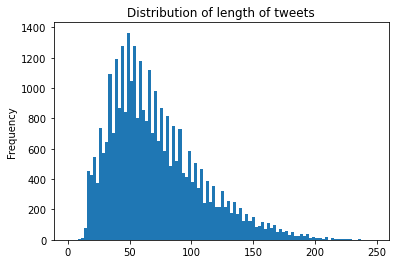

In [15]:
# Plotting Tweet length using Histogram
df_src['tweet_length'].plot(bins = 100, kind = 'hist',title = 'Distribution of length of tweets');

<AxesSubplot:title={'center':'Distribution of word counts in a tweet'}, ylabel='Frequency'>

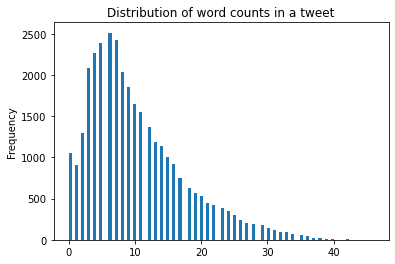

In [16]:
# Plotting the Word Count using Histogram
df_src['word_count'].plot(bins = 100, kind = 'hist', title = 'Distribution of word counts in a tweet')

In [17]:
# Remove records that have word count less than or equal to 2 as they are not significant in sentiment analysis
df_src = df_src.loc[df_src["word_count"] > 3]

In [18]:
df_src.sample(10)

,text,created_at,address,longitude,latitude,loc,tweet_length,word_count
310209,be fearless take control of your destiny phot...,2020-03-01 14:13:09+00:00,"London, England",-0.127318,51.507115,L,94,11
117815,deadlifts after a warm up with x and x i manag...,2021-08-09 10:46:15+00:00,"Islington, London",-0.107485,51.562912,L,117,22
319437,selling accessories for starters finally ope...,2020-02-11 10:47:31+00:00,"London, England",-0.127318,51.507115,L,138,22
222960,min break from music brb - - ...,2020-08-20 01:16:21+00:00,"City of London, London",-0.109400,51.514100,L,52,7
53562,good rounds with theses hooligans ...,2022-05-20 14:05:50+00:00,"Southall, London",-0.314342,51.532544,L,52,6
227548,catch ups with gultekin and mrsarya the annua...,2020-08-11 19:25:22+00:00,"Hammersmith, London",-0.217881,51.471386,L,87,13
333134,reflecting you project new photoshoot in londo...,2020-01-14 07:28:59+00:00,"London, England",-0.127318,51.507115,L,125,18
196333,autumn at ruislip lido ruislip woods ...,2020-10-30 19:48:18+00:00,"London, England",-0.431488,51.589721,L,60,8
262285,tips from a psychology expert to beat your zo...,2020-06-08 12:02:14+00:00,"Croydon, London",-0.078643,51.357286,L,77,11
328830,save the date too proud to put this out i hope...,2020-01-22 16:44:26+00:00,"London, England",-0.127318,51.507115,L,99,18


#### Print the Word Cloud to see most frequent words

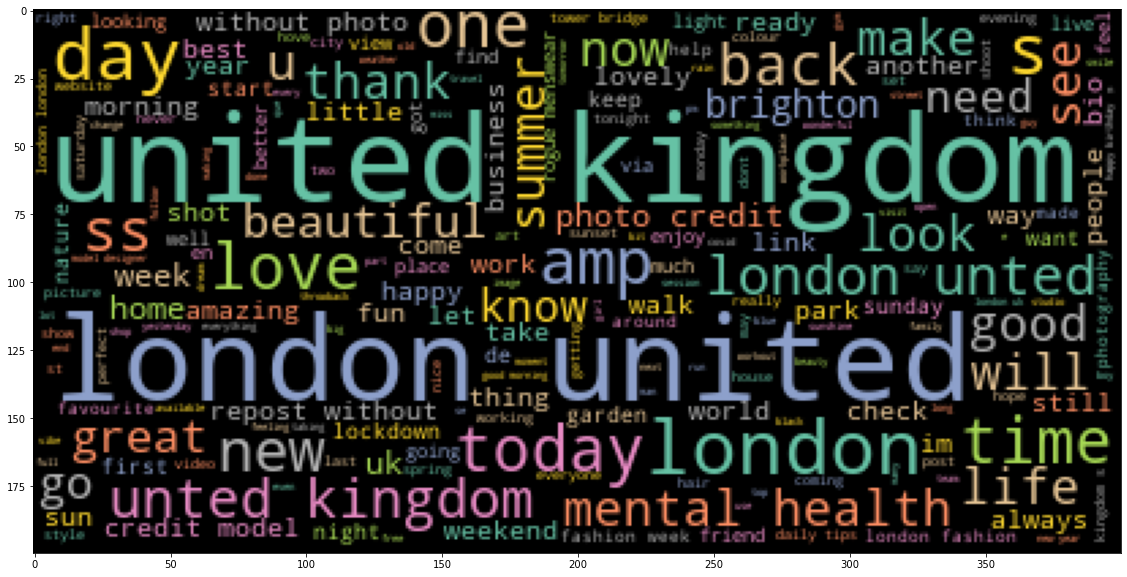

In [19]:
# Visualize Word Cloud
long_string = ','.join(list(df_src['text'].values))
wordcloud = WordCloud(background_color="black",colormap='Set2', max_words=5000, contour_width=3, 
contour_color='red')
wordcloud.generate(long_string)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.show()

#### Plotting the tweets distribution using CountPlot

<AxesSubplot:title={'center':'Tweets Count for London and Brighton'}, xlabel='London and Brighton Data', ylabel='Count'>

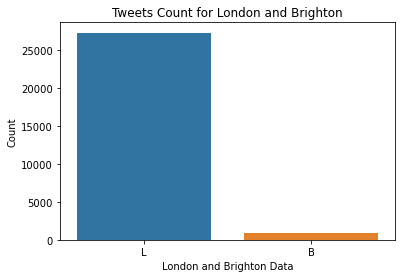

In [20]:
# Print Countplot for London and Brighton Data
c=sns.countplot(x=df_src["loc"])
c.set_xlabel('London and Brighton Data')
c.set_ylabel('Count')
c.set_title('Tweets Count for London and Brighton')
c

# Implementing BERT Model for Sentiment Analysis

In this step, we will be implementing the BERT (bert-base-cased) model and calculation the sentiment associated with each text. 

### 5.1 Tokenizing DataFrame and Implementing Pre-Trained BERT

In [21]:
# Pretrained Auto Tokenizer
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Model defining
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [22]:
# print(model.config)

In [23]:
# Defining function bert_sentiment to calculate sentiment
def bert_sentiment(tweet):
    tokens = tokenizer.encode(tweet, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [24]:
# The sentiment result will be stored in a new column called Sentiment
df_bert=df_src
# df_bert=df_src.sample(1000)
df_bert['sentiment'] = df_bert['text'].apply(lambda x: bert_sentiment(x[:512]))

In [25]:
# Saving the result to a CSV file
df_bert.to_csv('sentiment_data.csv')

In [26]:
pd.set_option('display.max_colwidth', None)

In [27]:
df_bert.sample(3)

,text,created_at,address,longitude,latitude,loc,tweet_length,word_count,sentiment
311855,say hi to my new friends,2020-02-26 21:33:51+00:00,"Camden Town, London",-0.161111,51.561111,L,49,6,5
305291,no repost without photo credit model designer sh,2020-03-11 16:18:10+00:00,"Hammersmith, London",-0.210285,51.496604,L,63,8,1
320347,the storm is coming battersea sujtcuu,2020-02-09 13:21:44+00:00,"Wandsworth, London",-0.167711,51.463769,L,42,6,5


# Visualizing sentiment Data

Text(0.5, 1.0, 'Distribution of Sentiment Data')

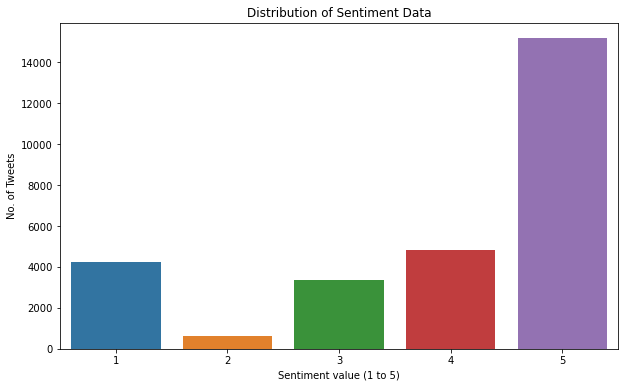

In [28]:
# Print Countplot for London and Brighron Data
fig= plt.figure(figsize=(10,6))
sns.countplot(x=df_bert["sentiment"])
plt.xlabel("Sentiment value (1 to 5)")
plt.ylabel("No. of Tweets")
plt.title("Distribution of Sentiment Data")

In [29]:
# printing the dataframe info
df_bert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28211 entries, 112 to 339073
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   text          28211 non-null  object             
 1   created_at    28211 non-null  datetime64[ns, UTC]
 2   address       28211 non-null  object             
 3   longitude     28211 non-null  float64            
 4   latitude      28211 non-null  float64            
 5   loc           28211 non-null  object             
 6   tweet_length  28211 non-null  int64              
 7   word_count    28211 non-null  int64              
 8   sentiment     28211 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 2.2+ MB


# Exporting the Data

Now, in this step, we will be exporting our data to be used in the next model.

In [30]:
# Create a new dataframe with the selected list of columns
# df_bert['sentiment'] = df_bert['sentiment'].astype(str)
result = df_bert[['text','created_at','longitude','latitude','loc','sentiment']]
#Save the result to CSV
result.to_csv("ready_for_clustering.csv")

In [31]:
result.sample(2)

,text,created_at,longitude,latitude,loc,sentiment
108203,do love these anti gravity squat racks // giants gym london,2021-09-13 17:59:56+00:00,-0.11910,51.60637,L,5
338728,aaaaah so much fun with my loves last night thank you for the new year vibes # draft house,2020-01-01 18:41:27+00:00,-0.10381,51.51916,L,5


In [32]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28211 entries, 112 to 339073
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   text        28211 non-null  object             
 1   created_at  28211 non-null  datetime64[ns, UTC]
 2   longitude   28211 non-null  float64            
 3   latitude    28211 non-null  float64            
 4   loc         28211 non-null  object             
 5   sentiment   28211 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(2)
memory usage: 1.5+ MB
